<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [19]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [22]:
# Ваш код здесь
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак age) женщин?**

In [23]:
# Ваш код здесь
data[data.sex=='Female'].age.mean()

36.85823043357163

**3. Какова доля граждан Германии (признак native-country)?**

In [24]:
# Ваш код здесь
data['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

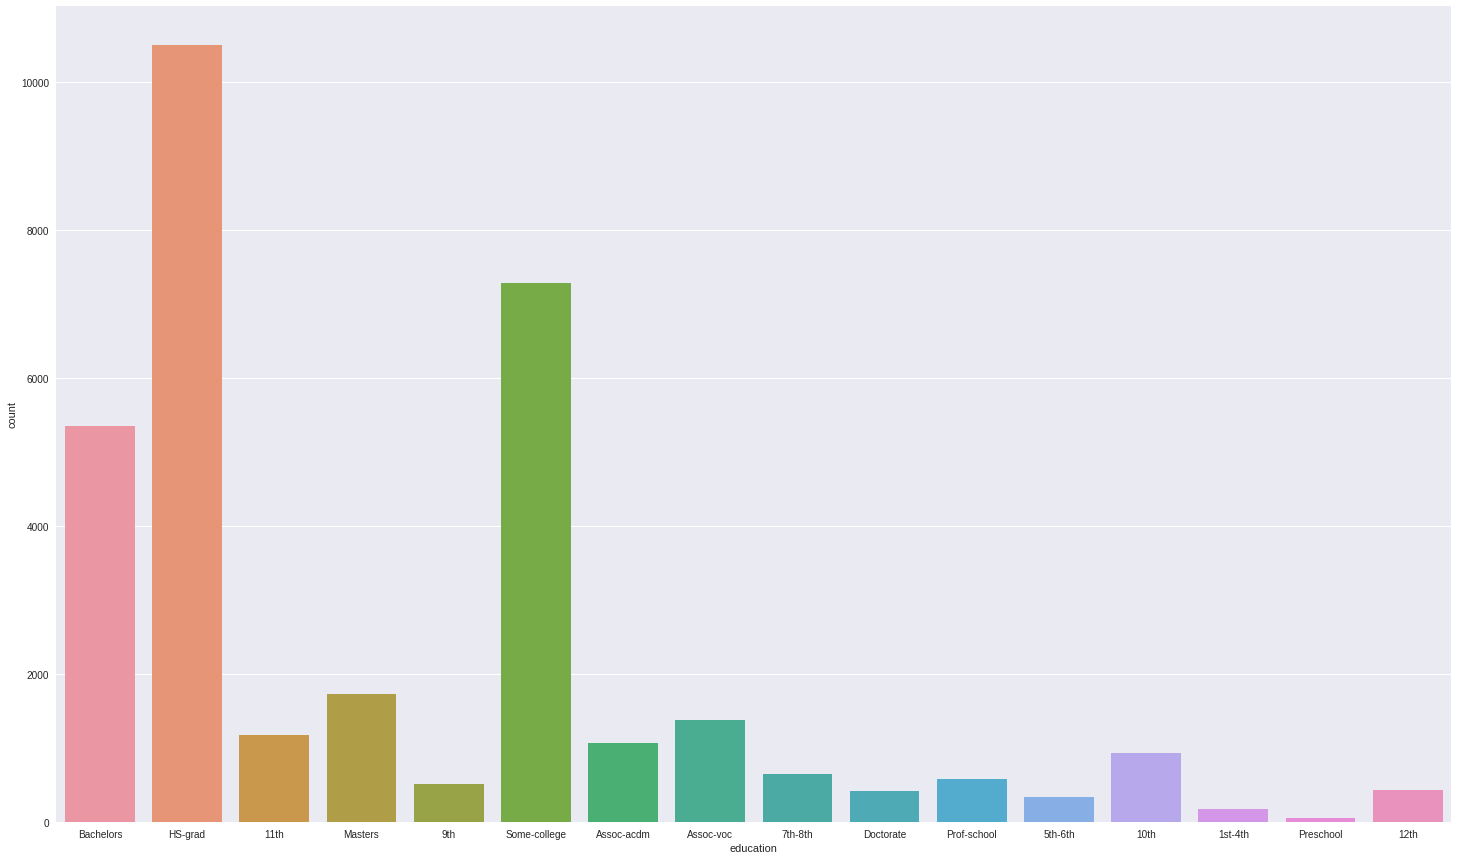

In [25]:
# Ваш код здесь
pylab.figure(figsize=(25,15))
sns.countplot(x='education',data=data);

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [26]:
# Ваш код здесь
# data.salary.value_counts()
data.groupby(['salary'])['age'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
salary,,,,
<=50K,36.783738,14.020088,17,90
>50K,44.249841,10.519028,19,90


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [27]:
# Ваш код здесь
data[data.salary=='>50K'].education.value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [28]:
# Ваш код здесь
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [29]:
data.groupby(['race','sex']).describe()

age  capital-gain  capital-loss  \
race               sex                                                      
Amer-Indian-Eskimo Female count    119.000000    119.000000    119.000000   
                          mean      37.117647    544.605042     14.462185   
                          std       13.114991   2451.591587    157.763811   
                          min       17.000000      0.000000      0.000000   
                          25%       27.000000      0.000000      0.000000   
                          50%       36.000000      0.000000      0.000000   
                          75%       46.000000      0.000000      0.000000   
                          max       80.000000  15024.000000   1721.000000   
                   Male   count    192.000000    192.000000    192.000000   
                          mean      37.208333    675.260417     46.395833   
                          std       12.049563   2929.745443    286.562584   
                          min       17.000000      0.000000      0.000000   
                          25%       28.000000      0.000000      0.000000   
                          50%       35.000000      0.000000      0.000000   
                          75%       45.000000      0.000000      0.000000   
                          max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander Female count    346.000000    346.000000    346.000000   
                          mean      35.089595    778.436416     50.852601   
                          std       12.300845   7675.228631    296.529225   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       33.000000      0.000000      0.000000   
                          75%       43.750000      0.000000      0.000000   
                          max       75.000000  99999.000000   2258.000000   
                   Male   count    693.000000    693.000000    693.000000   
                          mean      39.073593   1827.813853    120.373737   
                          std       12.883944  10947.525528    472.917697   
                          min       18.000000      0.000000      0.000000   
                          25%       29.000000      0.000000      0.000000   
                          50%       37.000000      0.000000      0.000000   
...                                       ...           ...           ...   
Other              Female std       11.631599   1317.326460    231.796929   
                          min       17.000000      0.000000      0.000000   
                          25%       23.000000      0.000000      0.000000   
                          50%       29.000000      0.000000      0.000000   
                          75%       39.000000      0.000000      0.000000   
                          max       74.000000   7688.000000   1740.000000   
                   Male   count    162.000000    162.000000    162.000000   
                          mean      34.654321   1392.185185     77.746914   
                          std       11.355531  11093.711595    370.986720   
                          min       17.000000      0.000000      0.000000   
                          25%       26.000000      0.000000      0.000000   
                          50%       32.000000      0.000000      0.000000   
                          75%       42.000000      0.000000      0.000000   
                          max       77.000000  99999.000000   2179.000000   
White              Female count   8642.000000   8642.000000   8642.000000   
                          mean      36.811618    573.610391     65.390535   
                          std       14.329093   4763.131649    352.330817   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       35

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [30]:
# Ваш код здесь
data[(data.sex=='Male')&(data.salary=='>50K')]['marital-status'].value_counts()

Married-civ-spouse       5938
Never-married             325
Divorced                  284
Separated                  49
Widowed                    39
Married-spouse-absent      23
Married-AF-spouse           4
Name: marital-status, dtype: int64

**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [31]:
# Ваш код здесь
data['hours-per-week'].max()

99

In [32]:
data[data['hours-per-week']==99].shape[0]

85

In [33]:
data[data['hours-per-week']==99]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [82]:
# Ваш код здесь
data_hpw=data.groupby(['native-country','salary'])['hours-per-week'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
data_hpw.Japan

salary
<=50K    41.000000
>50K     47.958333
Name: hours-per-week, dtype: float64